In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import nltk
import string
import warnings
warnings.filterwarnings("ignore") 

### Importing file from Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [0]:
path = "gdrive/My Drive/150kpts.csv"

In [0]:
data = pd.read_csv(path)

In [7]:
data.head(2)

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Cleaned_Text
0,417839,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,1,944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,beetlejuic well written movi everyth excel act...
1,346055,374359,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,1,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",twist rumplestiskin captur film star michael k...


In [0]:
from sklearn.model_selection import train_test_split
df_data = data.head(80000)

### Train Test Split of Dataset

In [0]:
x_train, x_test, y_train, y_test = train_test_split(df_data['Cleaned_Text'] ,df_data['Score'], test_size=0.3, shuffle = False)

In [0]:
from keras.preprocessing.text import Tokenizer

### Text Tokenizer (Converting text to numbers based on the frequency of their occurence)

In [0]:
tokenizer = Tokenizer(num_words=7000)
tokenizer.fit_on_texts(x_train)

x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [13]:
print(x_train[1])
print(type(x_train[1]))
print(len(x_train[1]))

[1427, 4167, 1428, 219, 2868, 2649, 3684, 3068, 1540, 2371, 2233, 4413, 5417, 73, 2143, 559, 3146, 1409]
<class 'list'>
18


In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

### Sequence Padding (To convert all inputs to the same size)

In [15]:
max_review_length = 400
x_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length)

print(x_train.shape)

(56000, 400)


In [16]:
print(x_train[1])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

### Model 1 - One LSTM layer

In [17]:
embedding_vector_length = 32
top_words = 7000
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 32)           224000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 277,301
Trainable params: 277,301
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
from datetime import datetime

In [20]:
start = datetime.now()
epochs = 5
history = model.fit(x_train, y_train, nb_epoch= epochs, batch_size=64,validation_data=(x_test, y_test))
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print('Time taken to run this cell',datetime.now()-start)

Train on 56000 samples, validate on 24000 samples
Epoch 1/5
56000/56000 [==============================] - 798s 14ms/step - loss: 0.2349 - acc: 0.9138 - val_loss: 0.2077 - val_acc: 0.9197
Epoch 2/5
56000/56000 [==============================] - 800s 14ms/step - loss: 0.1642 - acc: 0.9388 - val_loss: 0.2039 - val_acc: 0.9207
Epoch 3/5
56000/56000 [==============================] - 800s 14ms/step - loss: 0.1438 - acc: 0.9470 - val_loss: 0.2204 - val_acc: 0.9148
Epoch 4/5
56000/56000 [==============================] - 801s 14ms/step - loss: 0.1295 - acc: 0.9532 - val_loss: 0.2126 - val_acc: 0.9175
Epoch 5/5
56000/56000 [==============================] - 800s 14ms/step - loss: 0.1155 - acc: 0.9590 - val_loss: 0.2314 - val_acc: 0.9181
Time taken to run this cell 1:10:23.607837


In [21]:
print('Test loss:', scores[0])
print("Accuracy: %.2f%%" % (scores[1]*100))

Test loss: 0.23140542059515914
Accuracy: 91.81%


### Dynamic plot showing the crossentropy loss for train and test set for each epoch

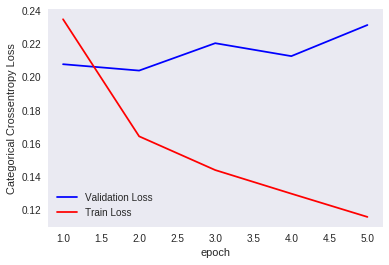

In [22]:
epochs = 5
%matplotlib inline
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
vy = history.history['val_loss']
ty = history.history['loss']
x = list(range(1,epochs+1))
ax.plot(x, vy, 'b', label="Validation Loss")
ax.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.grid()
fig.canvas.draw()

### Model 2 - Three LSTM layers

In [24]:
embedding_vector_length = 32
top_words = 7000
model1 = Sequential()
model1.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model1.add(LSTM(100,return_sequences=True))
model1.add(LSTM(70,return_sequences=True))
model1.add(LSTM(30,))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 400, 32)           224000    
_________________________________________________________________
lstm_5 (LSTM)                (None, 400, 100)          53200     
_________________________________________________________________
lstm_6 (LSTM)                (None, 400, 70)           47880     
_________________________________________________________________
lstm_7 (LSTM)                (None, 30)                12120     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 337,231
Trainable params: 337,231
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
start = datetime.now()
epochs = 4
history1 = model1.fit(x_train, y_train, nb_epoch= epochs, batch_size=128,validation_data=(x_test, y_test))
# Final evaluation of the model
scores1 = model1.evaluate(x_test, y_test, verbose=0)
print('Time taken to run this cell',datetime.now()-start)

Train on 56000 samples, validate on 24000 samples
Epoch 1/4
56000/56000 [==============================] - 1194s 21ms/step - loss: 0.2742 - acc: 0.9043 - val_loss: 0.2216 - val_acc: 0.9168
Epoch 2/4
56000/56000 [==============================] - 1161s 21ms/step - loss: 0.1679 - acc: 0.9368 - val_loss: 0.2113 - val_acc: 0.9197
Epoch 3/4
56000/56000 [==============================] - 1151s 21ms/step - loss: 0.1453 - acc: 0.9473 - val_loss: 0.2068 - val_acc: 0.9196
Epoch 4/4
56000/56000 [==============================] - 1154s 21ms/step - loss: 0.1291 - acc: 0.9534 - val_loss: 0.2214 - val_acc: 0.9197
Time taken to run this cell 1:28:46.179967


In [27]:
print('Test loss:', scores1[0])
print("Accuracy: %.2f%%" % (scores1[1]*100))

Test loss: 0.22137962412585815
Accuracy: 91.97%


### Dynamic plot showing the crossentropy loss for train and test set for each epoch

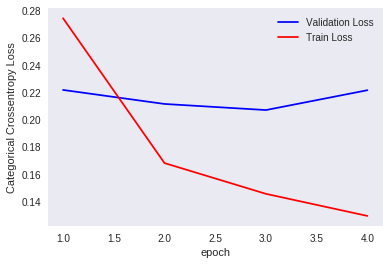

In [28]:
epochs = 4
%matplotlib inline
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
vy = history1.history['val_loss']
ty = history1.history['loss']
x = list(range(1,epochs+1))
ax.plot(x, vy, 'b', label="Validation Loss")
ax.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.grid()
fig.canvas.draw()

### Observations

1. It can be observed that as the number of LSTM layers are increased, the performance of the model can be improved. 

2. Also the difference between the validation loss and the test loss can be reduced by increasing more LSTM layers and also increaseing the number of reviews in which the model is trained upon.